Импорт необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve


Подгружаем датасет

In [2]:
import warnings
warnings.filterwarnings('ignore')
#from google.colab import drive для работы в google collab
#drive.mount('/content/drive')

In [4]:
#df = pd.read_csv("drive/MyDrive/mushrooms.csv") для работы в google collab
df = pd.read_csv("mushrooms.csv")
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


Датасет новый, так что вот его небольшое описание:
Этот набор данных включает описания гипотетических образцов, соответствующих 23 видам жаберных грибов семейства Agaricus и Lepiota, взятых из полевого руководства Общества Одюбона по североамериканским грибам (1981). Каждый вид идентифицируется как определенно съедобный, определенно ядовитый или с неизвестной съедобностью и не рекомендуется. Этот последний класс был объединен с ядовитым.

Почистим пропущенные значения на всякий случай:

In [5]:
df_new = df.dropna()
df=df_new

Проверим, есть ли столбцы в которых все значения одинаковые - они не будут иметь смысла для классификации, поэтому их лучше удалить.

In [6]:
for column in df.columns:
    unique_values = df[column].nunique()
    if unique_values == 1:
        print(f"У столбца {column} все значения одинаковые.")

У столбца veil-type все значения одинаковые.


У столбца veil-type все значения одинаковые, удалим его.

In [7]:
df = df.drop(["veil-type"],axis=1)

Эта функция библиотеки pandas предоставляет статистическое описание числовых столбцов датасета:

count - количество значений

unique - количество уникальных категорий

top - самое часто встречающееся значение (самую часто встречающуюся категорию)

freq(frequency) - частота top

In [8]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,4,9,9,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,s,w,w,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148


Возьмем атрибут "class" - он содержит в себе информацию о ядовитости грибов: p - ядовитый, e - съедобный. Попробуем взять его в качестве целевого класса и оценим его сбалансированность

Датасет большой, проверим точно ли в этом атрибуте только p и e:

In [9]:
df['class'].unique()

array(['p', 'e'], dtype=object)

Все верно, идем дальше. Для оценки сбалансированности можем посмотреть на гистограмму частот ядовитых и съедобных грибов.

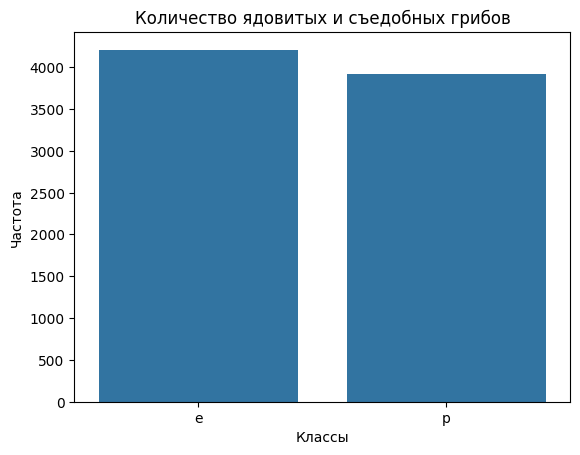

In [10]:
count = df['class'].value_counts()
sns.barplot(x=count.index, y=count.values)
plt.ylabel('Частота')
plt.xlabel('Классы')
plt.title('Количество ядовитых и съедобных грибов')
plt.show()

На гистограмме видно, что классы сбалансированны (примерно похожая частота). Значит, берем этот атрибут в качестве целевого класса.

Для дальнейшей работы нам нужно преобразовать текстовые данные в числовые. Для этого можно использовать функцию LabelEncoder() из библиотеки scikit-learn, но т.к. она преобразует данные
 в числовые ИЗ категориальных, нам нужно сначала преобразовать наши данные из типа "object" (выше было видно что dtype=object) в тип "category"

In [11]:
df = df.astype('category')
df.dtypes
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,2,7,7,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,2,7,7,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,2,7,7,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,2,7,7,2,1,4,2,3,3


Установка осей X и Y и разделение данных на обучение и тестирование соответственно.

Поскольку мы хотим предсказать ядовитость гриба, мы удалим столбец «class»


Функция train_test_split из библиотеки scikit-learn для разделения данных на обучающую и тестовую выборки. Параметры:

X - признаки (features).
y - целевая метка (target).
test_size=0.1 - 10% данных будет использоваться для тестирования, а 90% для обучения.

In [12]:
X = df.drop(["class"], axis=1)
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

# Метод kNN - k ближайших соседей

Суть метода: посмотри на соседей, какие преобладают, таков и ты.

Для классификации каждого из объектов тестовой выборки необходимо последовательно выполнить следующие операции:

1)Вычислить расстояние до каждого из объектов обучающей выборки

2)Отобрать k объектов обучающей выборки, расстояние до которых минимально

3)Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди k ближайших соседей




In [13]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0 #переменная для оптимального значения числа соседей
best_score = 0 #переменная для наивысшей точности классификации на тестовой выборке
for i in range(1,10): #перебираем число соседей
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train) #Обучение классификатора на обучающих данных
    if knn.score(X_test, y_test) > best_score: #если точность классификации на тестовой выборке с использованием текущего значения k больше, чем текущий лучший результат
        best_score = knn.score(X_train, y_train)
        best_Kvalue = i

print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%


Применение обученной модели kNN к тестовым данным (X_test) для выполнения предсказаний.Вывод отчета о классификации с использованием функции classification_report из библиотеки scikit-learn. Здесь различные метрики оценки качества классификации, такие как точность (precision), полнота (recall), F1-мера для каждого класса. Реальные метки тестового набора (y_test) сравниваются с предсказанными метками (y_pred_knn)

In [14]:
y_pred_knn = knn.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       433
           1       0.99      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



# Метод дерева решений

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier() #экземпляр модели дерева решений
dt.fit(X_train, y_train) #обучение на данных

DecisionTreeClassifier()

In [16]:
y_pred_dt = dt.predict(X_test) #предсказания
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt)) #отчет о производительности классификатора на тестовых данных
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2))) #общая точность модели на тестовых данных

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy: 100.0%


*Визуализация дерева решений*

filled=True - узлы дерева будут закрашены в соответствии с большинством класса

feature_names - имена признаков,

class_names - имена классов

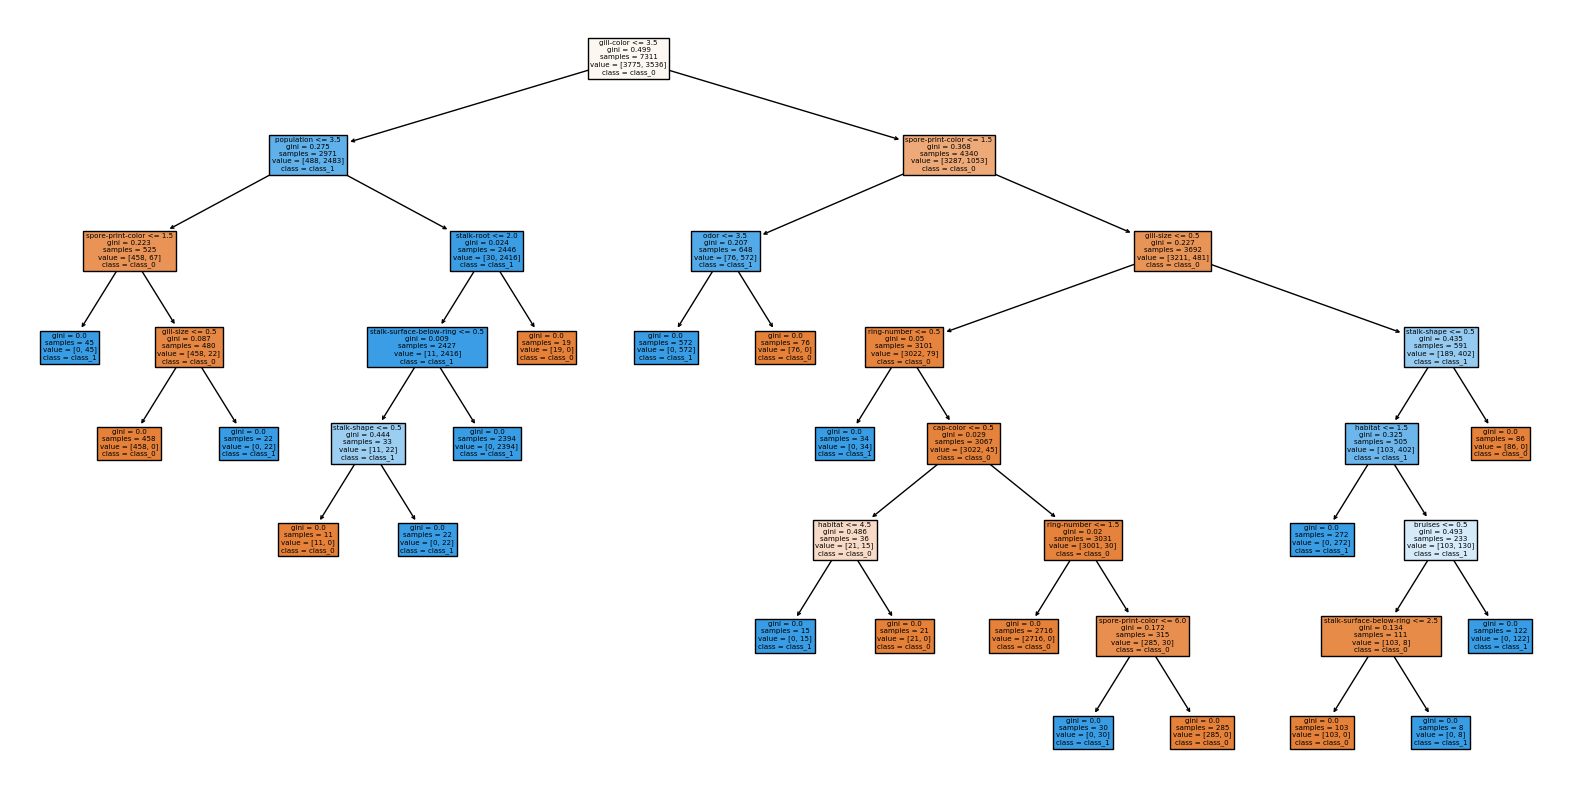

In [17]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=list(X.columns), class_names=['class_0', 'class_1'])
plt.show()

Чем больше объектов одного класса, тем цвет вершины ближе к темно-оранжевому и, наоборот, чем больше объектов второго класса, тем ближе цвет к темно-синему. В начале объектов одного класса поровну, поэтому корневая вершина дерева – белого цвета.



# Метрики оценки качества

ROC-метрика.

Используется для анализа поведения классификаторов при различных пороговых значениях. Позволяет рассмотреть все пороговые значения для данного классификатора. Показывает долю ложно положительных примеров (false positive rate, FPR) в сравнении с долей истинно положительных примеров ( true positive rate, TPR)

Прямая линия по диагонали представляет ROC-кривую чисто случайного классификатора. Хороший классификатор держится от указанной линии настолько далеко, насколько это возможно (стремясь к левому верхнему углу).

Один из способов сравнения классификаторов предусматривает измере­ние площади под кривой (англ. Area Under the Curve — AUC). Безупречный клас­сификатор будет иметь площадь под ROC-кривой (ROC-AUC), равную 1

# ROC-метрика для kNN

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve
y_prob_knn = knn.predict_proba(X_test)[:, 1] #Получаем вероятности положительного класса (класса 1) для каждого объекта в тестовом наборе данных
roc_knn = roc_auc_score(y_test, y_prob_knn) #Вычисляем площадь под кривой ROC для модели kNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn) #Вычисляем значения False Positive Rate (FPR) и True Positive Rate (TPR) для построения кривой ROC модели KNN.

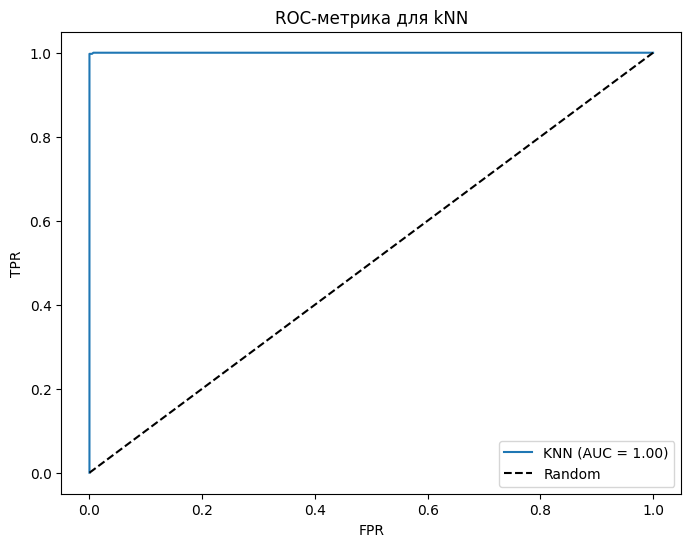

In [74]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_knn:.2f})') #кривая ROC для модели kNN
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random') #Добавляется линия случайного классификатора (ROC-кривая случайной модели)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-метрика для kNN')
plt.legend()
plt.show()

# ROC-метрика для дерева решений

In [19]:
y_prob_dt = dt.predict_proba(X_test)[:, 1]
roc_dt = roc_auc_score(y_test, y_prob_dt)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

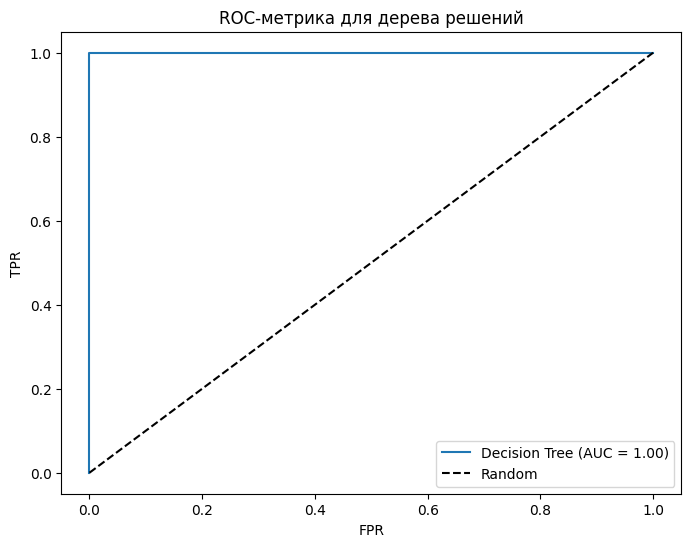

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_dt:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-метрика для дерева решений')
plt.legend()
plt.show()

# Вывод по ROC-метрике:

Оба метода классификации хорошие, т.к. они держатся от указанной линии настолько далеко, насколько это возможно (стремясь к левому верхнему углу), то есть мы наблюдаем высокий уровень True Positive Rate (TPR) при низком уровне False Positive Rate (FPR), что означает высокую чувствительность при минимальных ложных срабатываниях.Так же их площадь под ROC-кривой=1.

# Accuracy - метрика (выводилась выше, но посчитаем ее отдельно)

Это доля правильных ответов алгоритма

*Для kNN*

In [21]:
from sklearn.metrics import accuracy_score
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy for KNN: {accuracy_knn:.2%}')

Accuracy for KNN: 99.63%


*Для дерева решений*

In [22]:
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy for Decision Tree: {accuracy_dt:.2%}')

Accuracy for Decision Tree: 100.00%


По итогу для дерева решений все ответы правильные, для kNN почти все

# Presicion, Recall, F-measure  метрики

Presicion - точность - доля правильных ответов модели в пределах класса — это доля объектов действительно принадлежащих данному классу относительно всех объектов которые система отнесла к этому классу.Не позволяет нам записывать все объекты в один класс.

Recall - полнота. Полнота — это доля истинно положительных классификаций. Полнота показывает, какую долю объектов, реально относящихся к положительному классу, мы предсказали верно, она демонстрирует способность алгоритма обнаруживать данный класс вообще

F-measure  -  гармоническое среднее между точностью и полнотой. Она стремится к нулю, если точность или полнота стремится к нулю. Она сводит к одному числу две других основополагающих метрики: точность и полноту. Имея "F-меру" гораздо проще ответить на вопрос: "поменялся алгоритм в лучшую сторону или нет?"

Эти метрики были выведены выше, когда выводился отчет о результатах классификации. Проанализируем их тут:

* для kNN:*

Precision для класса 0(e): 1.00 (100%) -  все объекты, которые модель предсказала как класса 0(e), действительно принадлежат к классу 0.

Precision для класса 1(p): 0.99 (99%) - почти все объекты, которые модель предсказала как класса 1(p), принадлежат к классу 1

Recall для класса 0: 0.99 (99%) - модель смогла обнаружить почти все объекты класса 0.

Recall для класса 1: 1.00 (100%) - все объекты класса 1 были обнаружены.

F1-score для класса 0: 1.00 - Среднее гармоническое между точностью и полнотой для класса 0.

F1-score для класса 1: 1.00 - Среднее гармоническое между точностью и полнотой для класса 1.

*Для дерева решений по всем метрикам 1, то есть все идеально.*

## Вывод:
kNN дало результат очень близкий к идеальному, а дерево решений - идеальный результат.

*В первую очередь* это можно объяснить разностью в методах касаемо обучения: kNN использует близость между объектами, а дерево решений - признаки.

*Во-вторую* - у метода kNN есть некоторые минусы(у дерева решений тоже, но немного хуже тут сыграл именно kNN):

1)Нет теоретических оснований выбора определенного числа соседей — только перебор

2)Если в наборе данных много признаков, то трудно подобрать подходящие веса и определить, какие признаки не важны для классификации
